In [49]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os, warnings

import cosima_cookbook as cc

In [12]:
# try to mimic the cookbook two exp plus obs
from collections import OrderedDict
exptdict = OrderedDict([
    ('HI-00', # original historical run
     {'model': 'ACCESS-ESM 1.5', 'expt': 'HI-00',
      'n_files': -12, 'itime': '1850-01-01', 'ftime': None}),
    ('HI-02', # Pacific Pacemaker historical run
     {'model': 'ACCESS-ESM 1.5', 'expt': 'HI-02',
      'n_files': -12, 'itime': '1850-01-01', 'ftime': None}),
])

# Add on pre-interpolated WOA13 directories for every run:
for ekey in exptdict.keys():
    e = exptdict[ekey]
    if (ekey.find('025deg') != -1):
        e['WOA13expt'] = '025_KDS50'
        e['WOA13file'] = 'woa13_ts_??_mom025.nc'
    elif (ekey.find('01deg') != -1):
        e['WOA13expt'] = '01'
        e['WOA13file'] = 'woa13_ts_??_mom01.nc'
    else:
        e['WOA13expt'] = '10_KDS50'
        e['WOA13file'] = 'woa13_ts_??_mom10.nc'

exptdict['HI-00']

{'model': 'ACCESS-ESM 1.5',
 'expt': 'HI-00',
 'n_files': -12,
 'itime': '1850-01-01',
 'ftime': None,
 'WOA13expt': '10_KDS50',
 'WOA13file': 'woa13_ts_??_mom10.nc'}

In [13]:
# self defind functions

In [14]:
db = 'local_cc_test.db'
session = cc.database.create_session(db)
import glob
print(glob.glob(RUNDIR+expt2+fName)) 

In [50]:
# https://cosima-recipes.readthedocs.io/en/latest/tutorials/Make_Your_Own_Database.html
# clean up and only keep output*/ocean/
# add in one degree woa13
#directory_list=['/g/data/p66/ars599/access-esm/archive/HI-00',
#                '/g/data/p66/ars599/access-esm/archive/HI-02',
#                 '/g/data/ik11/observations/woa13/10_KDS50'
#               ]

#cc.database.build_index(directory_list, session)

Indexing experiment: HI-00


0it [00:00, ?it/s]


Indexing experiment: HI-02


0it [00:00, ?it/s]


Indexing experiment: 10_KDS50


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


13

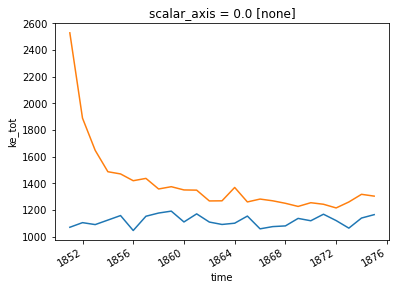

In [19]:
exp1 = 'HI-00'
exp2 = 'HI-02'
variable = 'ke_tot'
da1 = cc.querying.getvar(exp1, variable, session, ncfile='ocean_scalar.nc')
da2 = cc.querying.getvar(exp2, variable, session, ncfile='ocean_scalar.nc')
ann1 = da1.resample(time='A').mean(dim='time')
ann2 = da2.resample(time='A').mean(dim='time')
ann1.plot();
ann2.plot();

In [24]:
from collections import OrderedDict
exptdict = OrderedDict([
    ('HI-00', # original historical run
     {'model': 'ACCESS-ESM 1.5', 'expt': 'HI-00',
      'n_files': -12, 'itime': '1850-01-01', 'ftime': None}),
    ('HI-02', # Pacific Pacemaker historical run
     {'model': 'ACCESS-ESM 1.5', 'expt': 'HI-02',
      'n_files': -12, 'itime': '1850-01-01', 'ftime': None}),
])

In [38]:
# Function to extract and load SST and SSS from the models, WOA13
ekeys = ['HI-00','HI-02']
for ekey in ekeys:
    e = exptdict[ekey]

    # ke_tot
    # -----
    ke_tot = cc.querying.getvar(e['expt'], 'ke_tot', session,
                            n=e['n_files'], ncfile='ocean_scalar.nc',
                 start_time=e['itime'], end_time=e['ftime'])

    # Extract a year range string and print (for title string):
    e['yearrange'] = "{} to {}".format(
        ke_tot.time.item(0), #.strftime("%Y-%m"),
        ke_tot.time.item(-1), #.strftime("%Y-%m"),
    )
    print(f"{ekey}: {e['yearrange']}")
    # Add SST to dictionary
    e['ke_tot'] = ke_tot.mean('time').load()


HI-00: -3375432000000000000 to -2999419200000000000
HI-02: -3375432000000000000 to -2999419200000000000


In [48]:
e['expt']

'HI-02'